In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('drop.csv')

In [45]:
data

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
256,340,0.00,FX,0,0.00,FX,0.0,0.00,FX,0,2016,2016/2017
257,429,0.00,FX,0,0.00,FX,0.0,0.00,FX,0,2016,2016/2017
258,26,0.00,FX,0,0.00,FX,0.0,0.00,FX,0,2018,2018/2019
259,126,0.00,FX,0,0.00,FX,0.0,0.00,FX,0,2018,2018/2019


In [46]:
data.isnull().sum()

access           0
tests            0
tests_grade      0
exam             0
project          0
project_grade    0
assignments      0
result_points    0
result_grade     0
graduate         0
year             0
acad_year        0
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   access         261 non-null    int64  
 1   tests          261 non-null    float64
 2   tests_grade    261 non-null    object 
 3   exam           261 non-null    int64  
 4   project        261 non-null    float64
 5   project_grade  261 non-null    object 
 6   assignments    261 non-null    float64
 7   result_points  261 non-null    float64
 8   result_grade   261 non-null    object 
 9   graduate       261 non-null    int64  
 10  year           261 non-null    int64  
 11  acad_year      261 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 24.6+ KB


In [48]:
data['tests_grade'].unique()

array(['A', 'B', 'C', 'E', 'D', 'FX', '0'], dtype=object)

In [49]:
data['project_grade'].unique()

array(['A', 'C', 'D', 'FX', 'B', 'E', '0'], dtype=object)

In [50]:
data['result_grade'].unique()

array(['A', 'B', 'C', 'D', 'E', 'FX'], dtype=object)

In [51]:
data['acad_year'].unique()

array(['2019/2020', '2017/2018', '2018/2019', '2016/2017'], dtype=object)

In [52]:
data.tests_grade.replace(('A', 'B', 'C', 'E', 'D', 'FX', '0'),(1,2,3,4,5,6,7),inplace=True)
data.project_grade.replace(('A', 'B', 'C', 'E', 'D', 'FX', '0'),(1,2,3,4,5,6,7),inplace=True)
data.result_grade.replace(('A', 'B', 'C', 'E', 'D', 'FX'),(1,2,3,4,5,6),inplace=True)
data.acad_year.replace(('2019/2020', '2017/2018', '2018/2019', '2016/2017'),(1,2,3,4),inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   access         261 non-null    int64  
 1   tests          261 non-null    float64
 2   tests_grade    261 non-null    int64  
 3   exam           261 non-null    int64  
 4   project        261 non-null    float64
 5   project_grade  261 non-null    int64  
 6   assignments    261 non-null    float64
 7   result_points  261 non-null    float64
 8   result_grade   261 non-null    int64  
 9   graduate       261 non-null    int64  
 10  year           261 non-null    int64  
 11  acad_year      261 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 24.6 KB


In [54]:
x = data.drop(['access','graduate'], axis = 1)
y = data['graduate']

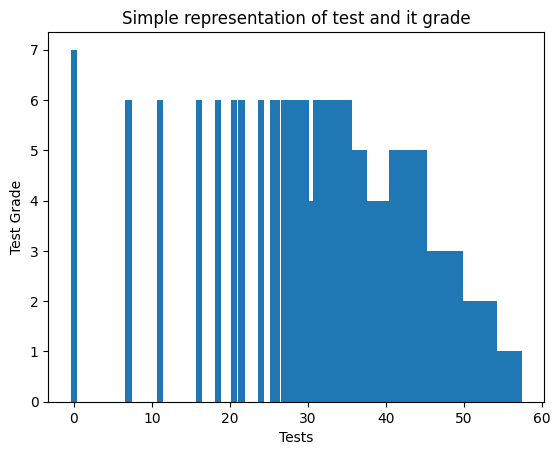

In [55]:
#relation between test and test_grade
test = data['tests']
t_grade = data['tests_grade']
plt.bar(test, t_grade)
plt.xlabel('Tests')
plt.ylabel('Test Grade')
plt.title('Simple representation of test and it grade')
plt.show()

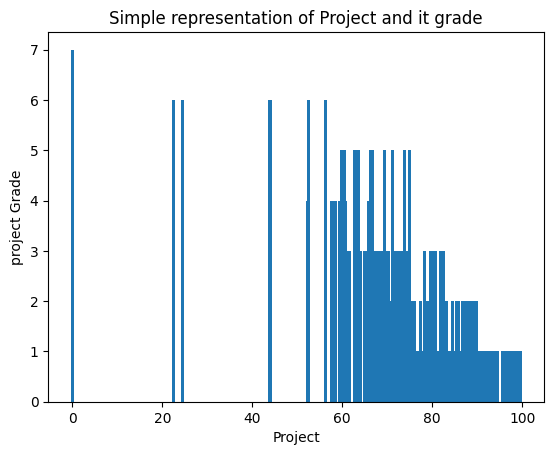

In [56]:
#relation between progect and project_grade
test = data['project']
t_grade = data['project_grade']
plt.bar(test, t_grade)
plt.xlabel('Project')
plt.ylabel('project Grade')
plt.title('Simple representation of Project and it grade')
plt.show()

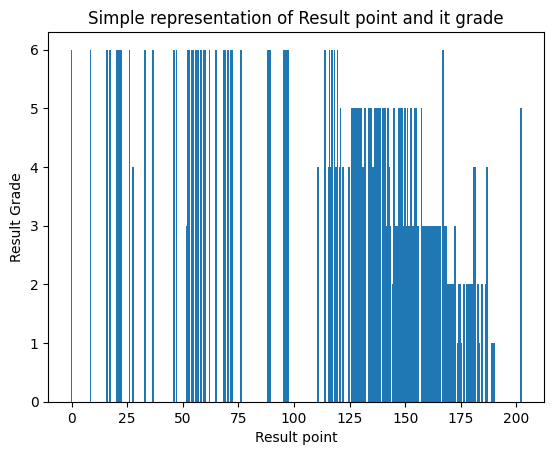

In [57]:
#relation between test and test_grade
test = data['result_points']
t_grade = data['result_grade']
plt.bar(test, t_grade)
plt.xlabel('Result point')
plt.ylabel('Result Grade')
plt.title('Simple representation of Result point and it grade')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [70]:
# create instances of all models
models = {
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
} 

from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name}:\nAccuracy: {acc:.4f}')

Support Vector Machine:
Accuracy: 0.8491
K-Nearest Neighbors:
Accuracy: 0.9811
Extra Trees:
Accuracy: 1.0000


In [73]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9811320754716981
